# Run Any Kind of OLS Regression (ANOVA, GLM, etc.)

### Authors: Calvin Howard.

#### Last updated: July 6, 2023

Use this to run/test a statistical model (e.g., regression or T-tests) on a spreadsheet.

Notes:
- To best use this notebook, you should be familar with GLM design and Contrast Matrix design. See this webpage to get started:
[FSL's GLM page](https://fsl.fmrib.ox.ac.uk/fsl/fslwiki/GLM)

# 00 - Import CSV with All Data
**The CSV is expected to be in this format**
- ID and absolute paths to niftis are critical
```
+-----+----------------------------+--------------+--------------+--------------+
| ID  | Nifti_File_Path            | Covariate_1  | Covariate_2  | Covariate_3  |
+-----+----------------------------+--------------+--------------+--------------+
| 1   | /path/to/file1.nii.gz      | 0.5          | 1.2          | 3.4          |
| 2   | /path/to/file2.nii.gz      | 0.7          | 1.4          | 3.1          |
| 3   | /path/to/file3.nii.gz      | 0.6          | 1.5          | 3.5          |
| 4   | /path/to/file4.nii.gz      | 0.9          | 1.1          | 3.2          |
| ... | ...                        | ...          | ...          | ...          |
+-----+----------------------------+--------------+--------------+--------------+
```

Prep Output Direction

In [1]:
# Specify where you want to save your results to
out_dir = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/atrophy_seeds_2023/Figures/agreement_of_experts/distribution_figures'

Import Data

In [2]:
# Specify the path to your CSV file containing NIFTI paths
input_csv_path = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/atrophy_seeds_2023/metadata/experiment_metadata/visually_rated_atrophy/rater_agreement_tiled.csv'
sheet = None

In [3]:
from calvin_utils.permutation_analysis_utils.statsmodels_palm import CalvinStatsmodelsPalm
# Instantiate the PalmPrepararation class
cal_palm = CalvinStatsmodelsPalm(input_csv_path=input_csv_path, output_dir=out_dir, sheet=sheet)
# Call the process_nifti_paths method
data_df = cal_palm.read_and_display_data()

/usr/local/Caskroom/mambaforge/base/envs/nimlab_py310/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,subject,Frontal,Temporal,Parietal,Occipital,Cerebellar,Mesial_Temporal,Ventriculomegaly,cerebellar_vermis,cerebellar_fissures,Rater,Coded_Disease_Status,Disease_Category
0,1,1,0,0,0,0,1,0,0.0,0.0,Neuro. Res.,1,CN
1,2,1,1,2,1,1,1,1,1.0,1.0,Neuro. Res.,1,CN
2,3,2,2,2,0,1,3,2,0.0,0.0,Neuro. Res.,3,AD
3,4,0,1,1,0,0,4,2,0.0,2.0,Neuro. Res.,1,CN
4,5,1,0,1,0,0,1,0,0.0,2.0,Neuro. Res.,1,CN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,46,1,1,2,1,1,2,1,NaN,NaN,Cog. Neuro.,3,AD
146,47,1,1,2,1,1,1,1,NaN,NaN,Cog. Neuro.,3,AD
147,48,2,1,3,1,1,2,2,NaN,NaN,Cog. Neuro.,1,CN
148,49,1,1,2,1,1,0,1,NaN,NaN,Cog. Neuro.,1,CN


# 01 - Preprocess Your Data

**Handle NANs**
- Set drop_nans=True is you would like to remove NaNs from data
- Provide a column name or a list of column names to remove NaNs from

In [4]:
data_df.columns

Index(['subject', 'Frontal', 'Temporal', 'Parietal', 'Occipital', 'Cerebellar',
       'Mesial_Temporal', 'Ventriculomegaly', 'cerebellar_vermis',
       'cerebellar_fissures', 'Rater', 'Coded_Disease_Status',
       'Disease_Category'],
      dtype='object')

In [5]:
drop_list = ['Frontal']

In [6]:
data_df = cal_palm.drop_nans_from_columns(columns_to_drop_from=drop_list)
display(data_df)

,subject,Frontal,Temporal,Parietal,Occipital,Cerebellar,Mesial_Temporal,Ventriculomegaly,cerebellar_vermis,cerebellar_fissures,Rater,Coded_Disease_Status,Disease_Category
0,1,1,0,0,0,0,1,0,0.0,0.0,Neuro. Res.,1,CN
1,2,1,1,2,1,1,1,1,1.0,1.0,Neuro. Res.,1,CN
2,3,2,2,2,0,1,3,2,0.0,0.0,Neuro. Res.,3,AD
3,4,0,1,1,0,0,4,2,0.0,2.0,Neuro. Res.,1,CN
4,5,1,0,1,0,0,1,0,0.0,2.0,Neuro. Res.,1,CN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,46,1,1,2,1,1,2,1,NaN,NaN,Cog. Neuro.,3,AD
146,47,1,1,2,1,1,1,1,NaN,NaN,Cog. Neuro.,3,AD
147,48,2,1,3,1,1,2,2,NaN,NaN,Cog. Neuro.,1,CN
148,49,1,1,2,1,1,0,1,NaN,NaN,Cog. Neuro.,1,CN


**Drop Row Based on Value of Column**

Define the column, condition, and value for dropping rows
- column = 'your_column_name'
- condition = 'above'  # Options: 'equal', 'above', 'below'

In [7]:
data_df.columns

Index(['subject', 'Frontal', 'Temporal', 'Parietal', 'Occipital', 'Cerebellar',
       'Mesial_Temporal', 'Ventriculomegaly', 'cerebellar_vermis',
       'cerebellar_fissures', 'Rater', 'Coded_Disease_Status',
       'Disease_Category'],
      dtype='object')

Set the parameters for dropping rows

In [8]:
column = 'City'  # The column you'd like to evaluate
condition = 'equal'  # The condition to check ('equal', 'above', 'below', 'not')
value = 'BWH' # The value to drop if found

In [9]:
data_df, other_df = cal_palm.drop_rows_based_on_value(column, condition, value)
display(data_df)

KeyError: 'City'

**Standardize Data**
- Enter Columns you Don't want to standardize into a list

In [ ]:
# Remove anything you don't want to standardize
cols_not_to_standardize = None # ['Z_Scored_Percent_Cognitive_Improvement_By_Origin_Group', 'Z_Scored_Subiculum_T_By_Origin_Group_'] #['Age']

In [ ]:
data_df = cal_palm.standardize_columns(cols_not_to_standardize)
data_df

In [ ]:
# for col in data_df.columns:
#     if 'CSF' and 'eh' not in col:
#         data_df[col] = data_df[col] * -1

# 02 - Compare Distributions Across 2 Categories

In [10]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from itertools import combinations
import math

class DataAnalysis:
    
    def __init__(self, xlim=None):
        """
        Initialize the DataAnalysis class with optional x-axis limits for plots.
        
        Parameters:
        xlim (tuple): Optional. A tuple specifying the x-axis limits (min, max) for the plots.
        """
        self.xlim = xlim
    
    def t_test(self, sample1, sample2):
        """
        Perform the 2-sample t-test for two samples.
        
        Parameters:
        sample1 (array-like): First sample data.
        sample2 (array-like): Second sample data.
        
        Returns:
        tuple: T statistic and p-value.
        """
        t_stat, p_value = ttest_ind(sample1, sample2)
        return t_stat, p_value
    
    def plot_boxplot(self, pivoted_df, ax, title, t_test_results):
        """
        Plot boxplots with jittered points for columns in the pivoted DataFrame.
        
        Parameters:
        pivoted_df (DataFrame): Pivoted DataFrame with samples as columns.
        ax (matplotlib.axes.Axes): Axes object to plot on.
        title (str): Title of the plot.
        t_test_results (dict): Dictionary containing t-test results for each pair of columns.
        """
        sns.boxplot(data=pivoted_df, ax=ax, palette="Set3")
        sns.stripplot(data=pivoted_df, ax=ax, color='black', jitter=True, dodge=True, alpha=0.6)
        
        ax.set_title(title)
        ax.set_xlabel('Categories')
        ax.set_ylabel('Values')
        if self.xlim is not None:
            ax.set_xlim(self.xlim[0], self.xlim[1])
        
        sns.despine()
        ax.grid(False)
        
        # Add t-test results at the bottom right-hand side
        text = "\n".join([f"{pair[0]}-{pair[1]}: p = {result[1]:.3e}" for pair, result in t_test_results.items()])
        ax.text(0.95, 0.05, text, ha='right', va='bottom', transform=ax.transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.0))

    def t_test_and_plot_boxplot(self, df, concat_col, category_cols, ax, verbose=False):
        """
        Perform t-test and plot boxplots for a given concatenation column.
        
        Parameters:
        df (DataFrame): Original DataFrame.
        concat_col (str): Column name to be concatenated for pivoting.
        category_cols (list): List of columns to categorize by.
        ax (matplotlib.axes.Axes): Axes object to plot on.
        verbose (bool): Optional. If True, print detailed t-test results.
        
        Returns:
        dict: Dictionary of t-test results for each pair of columns in the pivoted DataFrame.
        """
        pivoted_df = self.pivot_dataframe(df, concat_col, category_cols)
        
        t_test_results = {}
        
        for col1, col2 in combinations(pivoted_df.columns, 2):
            sample1 = pivoted_df[col1].dropna()
            sample2 = pivoted_df[col2].dropna()
            t_stat, p_value = self.t_test(sample1, sample2)
            t_test_results[(col1, col2)] = (t_stat, p_value)
            if verbose:
                print(f"T Statistic for {col1} vs {col2}: {t_stat}")
                print(f"P-value for {col1} vs {col2}: {p_value}")

        self.plot_boxplot(pivoted_df, ax, f'Boxplot Comparison for {concat_col}', t_test_results)
        
        return t_test_results

    def pivot_dataframe(self, df, concat_col, category_cols):
        """
        Pivot the DataFrame based on the concatenation column and category columns.
        
        Parameters:
        df (DataFrame): Original DataFrame.
        concat_col (str): Column name to be concatenated for pivoting.
        category_cols (list): List of columns to categorize by.
        
        Returns:
        DataFrame: Pivoted DataFrame.
        """
        df.reset_index(drop=True, inplace=True)
        pivoted_df = df.pivot_table(index=df.index, columns=category_cols, values=concat_col)
        
        return pivoted_df
    
    def orchestrate_t_tests(self, df, concat_cols, category_cols, outdir, filetype='svg'):
        """
        Orchestrate multiple iterations of t-tests and plot boxplots for a list of concatenation columns.
        
        Parameters:
        df (DataFrame): Original DataFrame.
        concat_cols (list): List of concatenation columns.
        category_cols (list): List of columns to categorize by.
        outdir (str): Output directory for saving plots.
        filetype (str): File type for saving plots (e.g., 'svg', 'png').
        
        Returns:
        dict: Dictionary containing t-test results for each concatenation column.
        """
        n = len(concat_cols)
        cols = math.ceil(math.sqrt(n))
        rows = math.ceil(n / cols)
        
        fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*5))
        axes = axes.flatten()

        all_t_test_results = {}
        
        for i, concat_col in enumerate(concat_cols):
            t_test_results = self.t_test_and_plot_boxplot(df, concat_col, category_cols, axes[i])
            all_t_test_results[concat_col] = t_test_results
        
        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])

        plt.tight_layout()
        plt.savefig(f"{outdir}/Boxplot_plots.{filetype}")
        plt.show()
        
        return all_t_test_results


In [11]:
xlabel = 'Atrophy Grade'
xlim = (0,4)
categories_to_assess_within = ['Frontal', 'Temporal', 'Parietal', 'Occipital', 'Cerebellar', 'Mesial_Temporal', 'Ventriculomegaly']
categories_to_assess_across = ['Rater']

/Users/cu135/.local/lib/python3.10/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]
/Users/cu135/.local/lib/python3.10/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)
/Users/cu135/.local/lib/python3.10/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]
/Users/cu135/.local/lib/python3.10/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)
/U

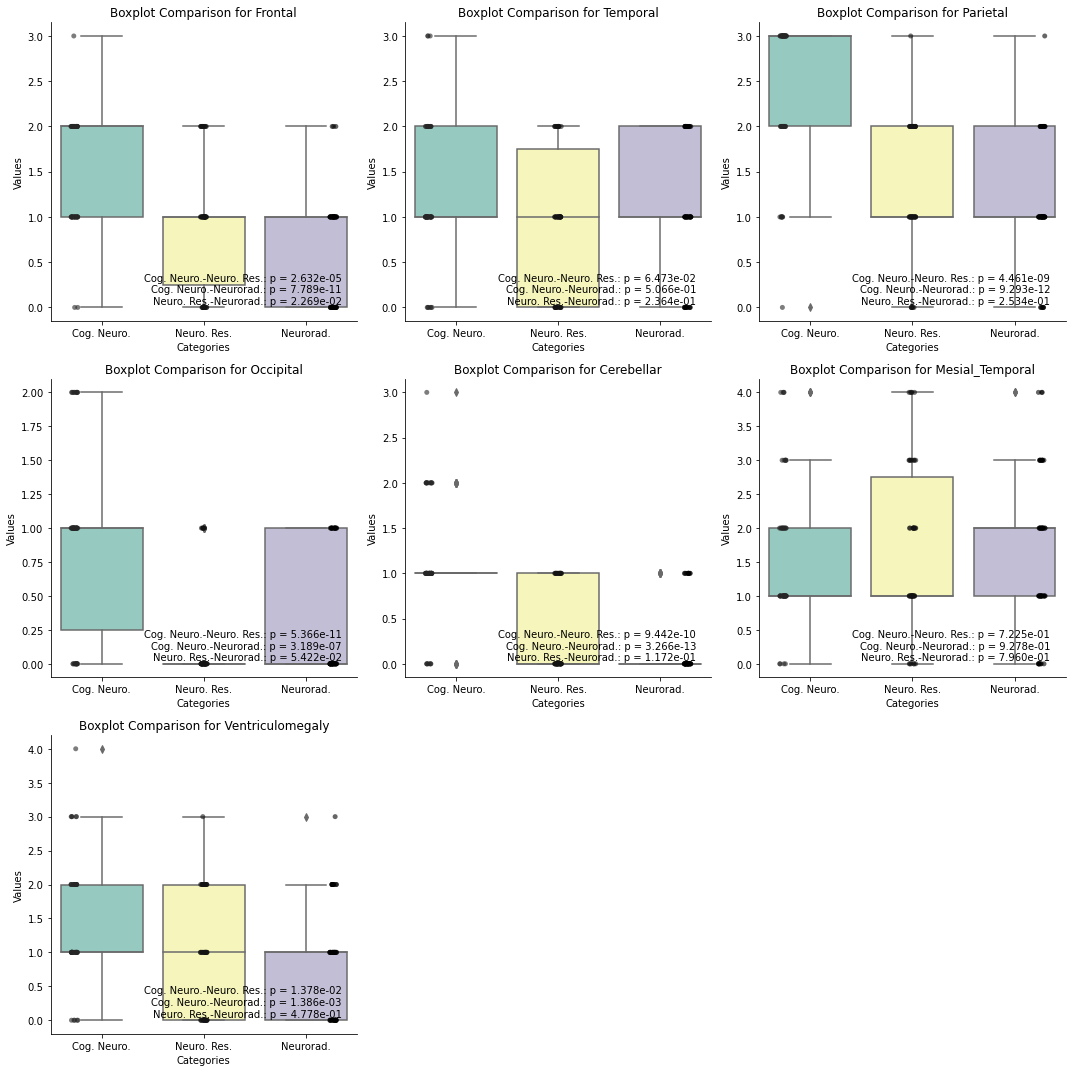

All pairwise t-test results:
Results for Frontal:
  ('Cog. Neuro.', 'Neuro. Res.'): T Statistic = 4.4120010680707615, P-value = 2.632099281071587e-05
  ('Cog. Neuro.', 'Neurorad.'): T Statistic = 7.296202293058669, P-value = 7.788602514082722e-11
  ('Neuro. Res.', 'Neurorad.'): T Statistic = 2.3151127844377233, P-value = 0.02269268577434177
Results for Temporal:
  ('Cog. Neuro.', 'Neuro. Res.'): T Statistic = 1.8681074865744074, P-value = 0.06473471981434469
  ('Cog. Neuro.', 'Neurorad.'): T Statistic = 0.6665759822254307, P-value = 0.5066092915272808
  ('Neuro. Res.', 'Neurorad.'): T Statistic = -1.1912264180152634, P-value = 0.23644182130976493
Results for Parietal:
  ('Cog. Neuro.', 'Neuro. Res.'): T Statistic = 6.439682449144758, P-value = 4.461276667754377e-09
  ('Cog. Neuro.', 'Neurorad.'): T Statistic = 7.734824397196607, P-value = 9.292575170819982e-12
  ('Neuro. Res.', 'Neurorad.'): T Statistic = 1.1488539158071065, P-value = 0.2534125506173987
Results for Occipital:
  ('Cog. 

In [12]:

# Example usage:
# Initialize the class
analysis = DataAnalysis()


# List of concat_cols
concat_cols = categories_to_assess_within

# Orchestrate multiple iterations of t-tests and plot boxplots
all_t_test_results = analysis.orchestrate_t_tests(data_df, concat_cols, categories_to_assess_across, outdir=out_dir)

# Print all pairwise t-test results
print("All pairwise t-test results:")
for concat_col, t_test_results in all_t_test_results.items():
    print(f"Results for {concat_col}:")
    for pair, result in t_test_results.items():
        print(f"  {pair}: T Statistic = {result[0]}, P-value = {result[1]}")
